**Problem Statement :**

We aim to predict which customers are likely to subscribe to a term deposit based on their demographic and behavioral data


---


**How the Model Can Help:**

By accurately identifying customers with a high probability of subscribing to a term deposit, the model enables the marketing team to:


*   Refine targeting: Direct marketing efforts towards the most promising leads, increasing conversion rates.
*     Optimize resource allocation: Allocate marketing resources more efficiently, reducing costs and improving ROI by focusing on clients who are more likely to engage.




bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")
# related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)
# other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Import lib

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [2]:
df1 = pd.read_csv('train.csv',sep=";")
df2 = pd.read_csv('test.csv',sep=";")
df = pd.concat([df1,df2]) # Combine train and test Datasets to one dataframe

In [3]:
df.head()
df.shape # Num of rows , num of columns

(49732, 17)

In [4]:
df.info() # Info about the columns - dtypes , num of records

<class 'pandas.core.frame.DataFrame'>
Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [5]:
df.describe() # Statisics insights

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


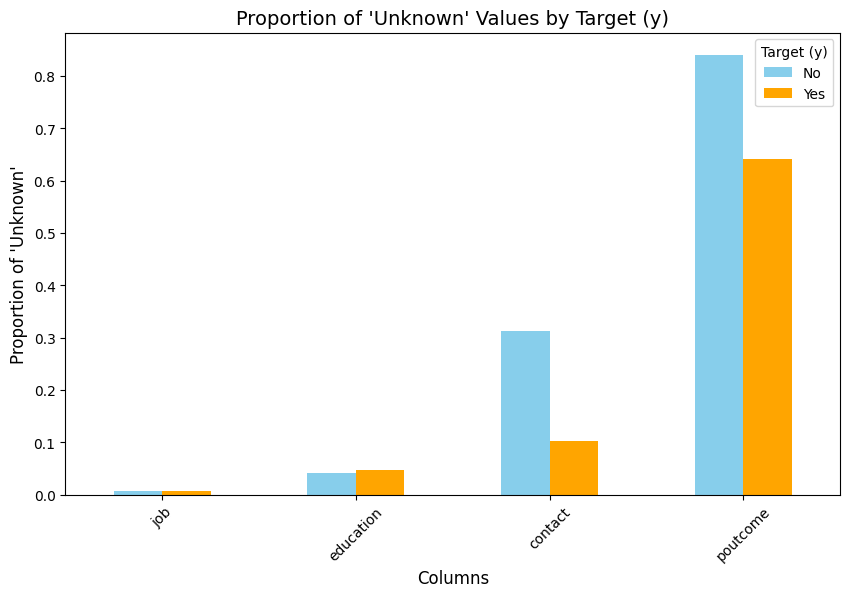

In [6]:
# List of columns with "unknown" values
unknown_columns = ["job", "education", "contact", "poutcome"]

# Calculate proportion of "unknown" values grouped by target
unknown_vs_target = {
    col: df.groupby('y')[col].apply(lambda x: (x == "unknown").mean())
    for col in unknown_columns
}

# Convert to DataFrame for visualization
unknown_vs_target_df = pd.DataFrame(unknown_vs_target).T
unknown_vs_target_df.columns = ["No", "Yes"]

# Plot the results
unknown_vs_target_df.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange"])
plt.title("Proportion of 'Unknown' Values by Target (y)", fontsize=14)
plt.ylabel("Proportion of 'Unknown'", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Target (y)", fontsize=10)
plt.show()
# It seems there is no relation between unknown values and the outcome - We will handle it as it is

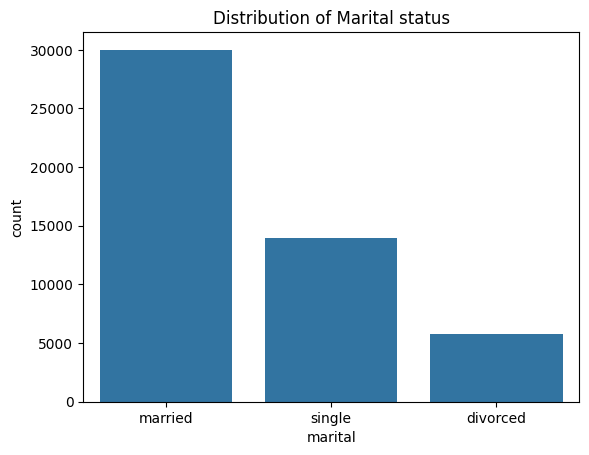

In [7]:
sns.countplot(data = df, x = 'marital')
plt.title("Distribution of Marital status")
plt.show()

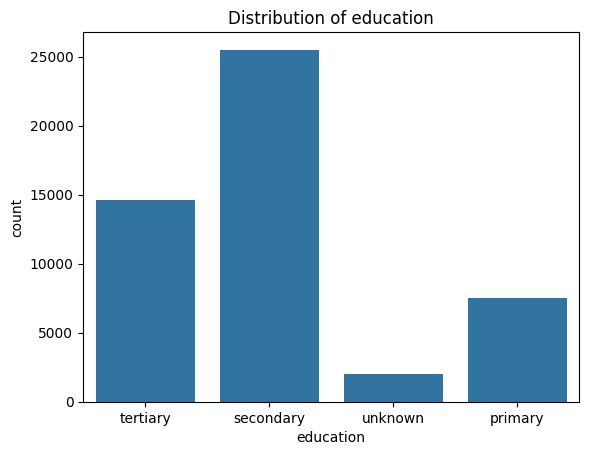

In [8]:
sns.countplot(data=df, x='education')
plt.title("Distribution of education")
plt.show()

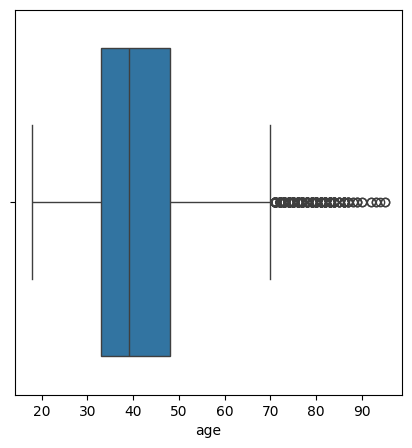

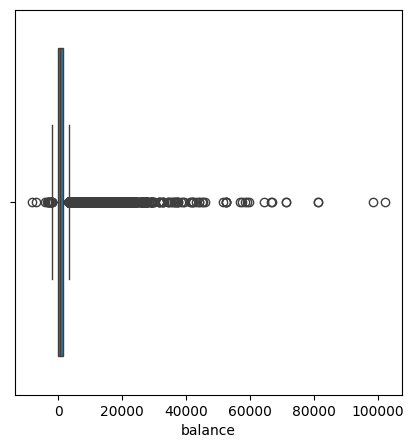

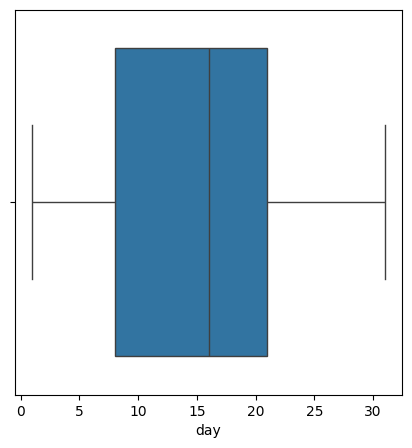

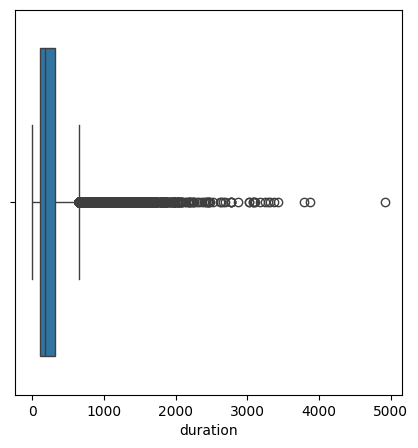

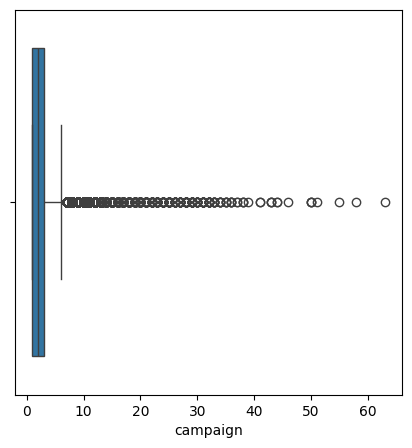

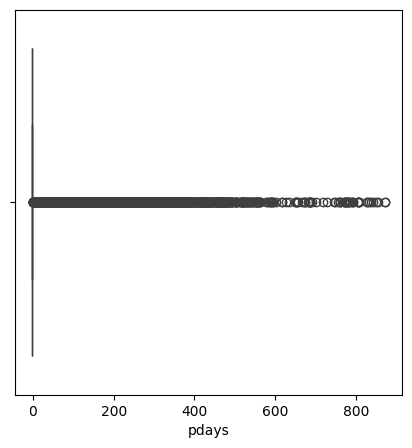

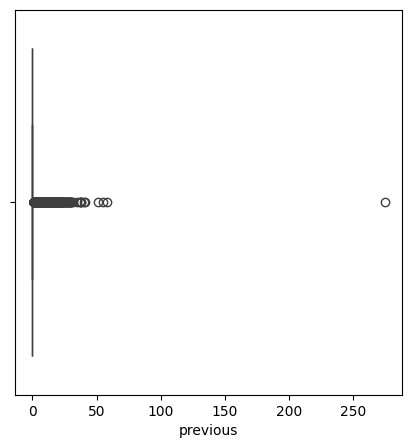

In [9]:
for i in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(5,5))
  sns.boxplot(x=df[i])
  plt.show

# To find any outliers

Text(0.5, 1.0, 'Correlation Matrix')

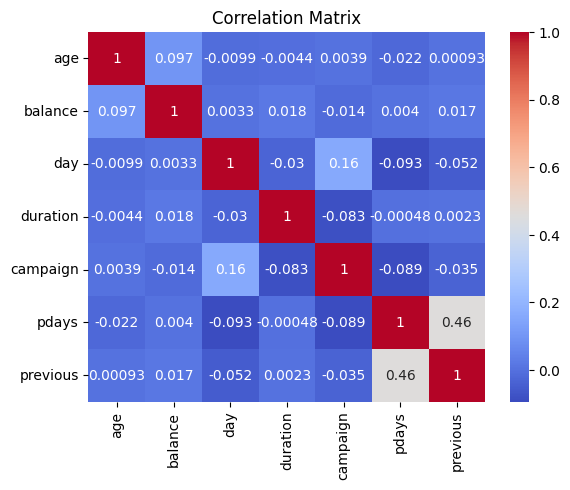

In [10]:
# Correlation matrix to find the relationship between the features
num_col = df.select_dtypes(include=np.number)
corr = num_col.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Pre-processing

### Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
for i in df.select_dtypes(include='object'):
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i])

# Convert categorical features to numerical values - prepare it for the model

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [13]:
df.y.value_counts()
# Showing Imbalanced on the target variable

,count
y,
0,43922
1,5810


### Applying SMOTE to balance the data

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x = df.drop(columns='y')
y = df['y']

smote = SMOTE(random_state=42)

x_res , y_res = smote.fit_resample(x,y)

In [15]:
new_df = pd.concat([x_res,y_res],axis=1) # Combine new records to a df
new_df.y.value_counts() # Checking the result

,count
y,
0,43922
1,43922


In [16]:
df = new_df.copy() # Assign the balanced df to the original df
df.shape

(87844, 17)

### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df[df.select_dtypes(include=np.number).columns] = scaler.fit_transform(df[df.select_dtypes(include=np.number).columns])

for i in df.select_dtypes(include=np.number).columns:
  if i != 'y':
    df[i] = scaler.fit_transform(df[[i]])

# Scale the values for more understanding to the machine

In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.560039,-0.104419,-0.140694,1.197602,-0.105997,0.192003,1.250436,-0.327795,2.049901,-1.320524,0.931437,-0.337477,-0.527676,-0.487264,-0.341601,0.548793,0
1,0.280752,1.562116,1.528325,-0.228385,-0.105997,-0.482905,1.250436,-0.327795,2.049901,-1.320524,0.931437,-0.654304,-0.527676,-0.487264,-0.341601,0.548793,0
2,-0.724402,-0.771034,-0.140694,-0.228385,-0.105997,-0.491524,1.250436,3.050688,2.049901,-1.320524,0.931437,-0.870323,-0.527676,-0.487264,-0.341601,0.548793,0
3,0.554885,-1.104341,-0.140694,2.623589,-0.105997,-0.011363,1.250436,-0.327795,2.049901,-1.320524,0.931437,-0.824239,-0.527676,-0.487264,-0.341601,0.548793,0
4,-0.724402,2.228730,1.528325,2.623589,-0.105997,-0.491844,-0.799721,-0.327795,2.049901,-1.320524,0.931437,-0.518933,-0.527676,-0.487264,-0.341601,0.548793,0


In [19]:
df.duplicated().sum()

7227

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.y.value_counts()

,count
y,
1,40695
0,39922


# Building the model

### Split the data into training and testing

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = df.drop(columns='y')
y = df['y']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

### RandoForest model

In [23]:
R_model = RandomForestClassifier(n_estimators=100,random_state=42)
R_model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = R_model.predict(x_test)

In [25]:
# #"Accuracy : ",accuracy_score(y_test,y_pred)
# classification_report(y_test,y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7939
           1       0.92      0.96      0.94      8185

    accuracy                           0.93     16124
   macro avg       0.94      0.93      0.93     16124
weighted avg       0.94      0.93      0.93     16124



### Decision Tree model

In [26]:
D_model = DecisionTreeClassifier(random_state=42)
D_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
yd_pred = D_model.predict(x_test)

In [28]:
d_report = classification_report(y_test, y_pred)
print("Classification Report:\n", d_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7939
           1       0.92      0.96      0.94      8185

    accuracy                           0.93     16124
   macro avg       0.94      0.93      0.93     16124
weighted avg       0.94      0.93      0.93     16124



### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [30]:
ylog_pred = log_model.predict(x_test)

In [31]:
accuracy_score(y_test,ylog_pred)

0.8538824113123294

In [32]:
log_report = classification_report(y_test, ylog_pred)
print("Classification Report:\n", log_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      7939
           1       0.84      0.88      0.86      8185

    accuracy                           0.85     16124
   macro avg       0.85      0.85      0.85     16124
weighted avg       0.85      0.85      0.85     16124



### Xgboost

In [33]:
import xgboost as gb

gb_model = gb.XGBClassifier()
gb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [34]:
gby_pred = gb_model.predict(x_test)

In [35]:
gb_report = classification_report(y_test, gby_pred)
print("Classification Report:\n", gb_report)
#

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      7939
           1       0.92      0.94      0.93      8185

    accuracy                           0.93     16124
   macro avg       0.93      0.92      0.93     16124
weighted avg       0.93      0.93      0.93     16124



### Support vector machine ( SVM ) model

In [36]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train,y_train)

SVC()

In [37]:
ysvm_pred = svm_model.predict(x_test)

In [38]:
svm_report = classification_report(y_test, ysvm_pred)
print("Classification Report:\n", svm_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89      7939
           1       0.88      0.92      0.90      8185

    accuracy                           0.89     16124
   macro avg       0.89      0.89      0.89     16124
weighted avg       0.89      0.89      0.89     16124



**Noticed that all Trees models getting the highest accuracy comparing to the others , that may because the data has non-linear patterns**

- For more experiments i may use

1- Cross-validation

2- Fine-Tuning the models

3- Exp with deep learning models

4- Applying stacking

# Deep learning Exp

In [39]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential(
    [
        Dense(32, activation='relu', input_shape=(x_train.shape[1],)), # Input layer with 32 nurons and relu activation function (0,Max) no negative numbers
        Dense(32, activation='relu'), # Hidden layer
        Dense(1, activation='sigmoid') # Output layer - (Binary - 1 " Classification case with 2 classes ") - sigmoid ( probability < 0.5 = class 0 --- > 0.5 = class 1 (0,1)
    ]
)
# We may add more neurons and layers for better accuracy
# Adding dropout layer or earlystopping to prevent overfitting
# Fine tunning hyperparameter - optimuzer ( Learning rate ) , epochs , etc....

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# We may use dropout or earlystopping to prevent overfitting if there is

Epoch 1/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8855 - loss: 0.2769 - val_accuracy: 0.8860 - val_loss: 0.2732
Epoch 2/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8874 - loss: 0.2734 - val_accuracy: 0.8890 - val_loss: 0.2692
Epoch 3/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8868 - loss: 0.2751 - val_accuracy: 0.8865 - val_loss: 0.2721
Epoch 4/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8887 - loss: 0.2689 - val_accuracy: 0.8872 - val_loss: 0.2697
Epoch 5/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8874 - loss: 0.2724 - val_accuracy: 0.8870 - val_loss: 0.2718
Epoch 6/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8897 - loss: 0.2668 - val_accuracy: 0.8896 - val_loss: 0.2652
Epoch 7/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8917 - loss: 0.2661 - val_accuracy: 0.8897 - val_loss: 0.2650
Epoch 8/10
1613/1613 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8921 - loss: 0.2659 - 

In [46]:
  model.evaluate(x_test, y_test)

504/504 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8843 - loss: 0.2752


[0.2738540470600128, 0.88712477684021]

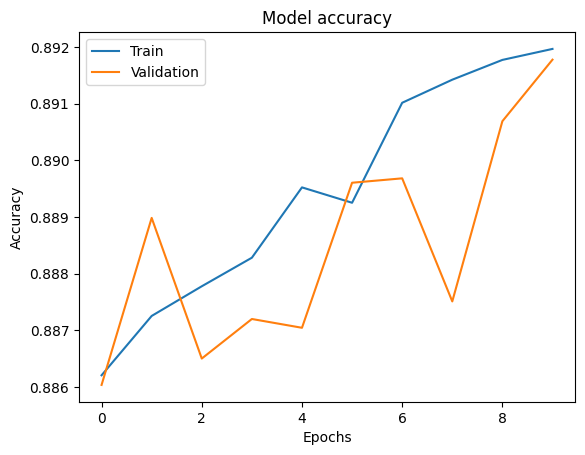

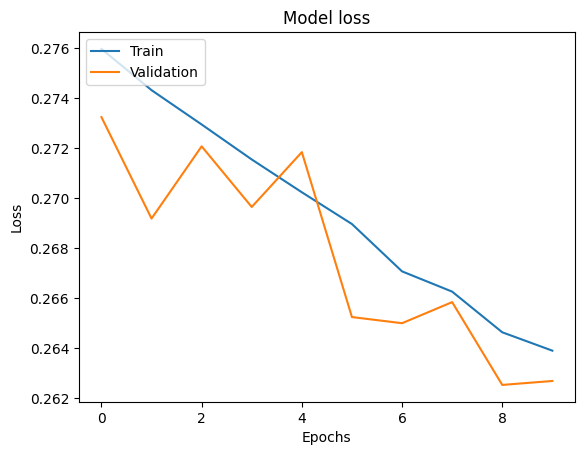

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Final report

| Model      | Accuracy | Precision   | Recall    | F1-Score  |
|------------|----------|-------------|-----------|-----------|
| R_model    | 0.85     | 0.918389    | 0.955528  | 0.936591  |
| D_model    | 0.92     | 0.890465    | 0.912767  | 0.901478  |
| log_model  | 0.78     | 0.841476    | 0.877459  | 0.859091  |
| gb_model   | 0.95     | 0.916936    | 0.937324  | 0.927018  |
| svm_model  | 0.88     | 0.876975    | 0.915333  | 0.895744  |
| ANN_model  | 0.90     | 0.885524    | 0.893097  | 0.889294  |



1.   Trees models are better because these models are better at capturing non-linear relationships and feature interactions
2.   Logestic regression performed relatively worse because it assumes a linear relationship between the features and the target variable



**Business Impact of this Case :**
*   If the model accurately predicts which clients are likely to subscribe to a term deposit, the marketing team can focus efforts on high-probability customers, improving ROI
*  This leads to a more efficient allocation of marketing resources, saving time and money by not targeting customers who are unlikely to subscribe.


**Future Enhancements - Experiments :**


*   Applying Cross-validation
* Grid , random Search
*   More exp on Deeplearning model - Fine-tunning, adding layers, neourons ..
* Pre-trained Deep learning models exp - need to read more

> Add blockquote


*   Apply Stacking
--------
- Questions:


1.   Should we remove outliers ?
2.   Is applying SMOTE correct if we are dealing with real Datasets ?
3. ..




